In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

In [64]:
def parse_move_history(file_path):
    moves = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("move"):
                parts = line.split()
                move_id = int(parts[1])
                x = int(parts[3][2:])
                y = int(parts[4][2:])
                d = int(parts[5][2:])
                k = int(parts[6][2:])  # Parsing k for completeness
                moves.append((move_id, x, y, d, k))
    return moves


def initialize_game(grid_size=64):
    grid = np.zeros((grid_size, grid_size), dtype=int)

    grid[31, 34:38] = 1
    grid[32, [34, 37]] = 1
    grid[33, [34, 37]] = 1
    grid[34, [31, 32, 33, 34, 37, 38, 39, 40]] = 1
    grid[35, [31, 40]] = 1
    grid[36, [31, 40]] = 1
    grid[37, [31, 32, 33, 34, 37, 38, 39, 40]] = 1
    grid[38, [34, 37]] = 1
    grid[39, [34, 37]] = 1
    grid[40, 34:38] = 1

    delta = (grid_size - 30) // 2
    centered_grid = np.zeros((grid_size, grid_size), dtype=int)
    for i in range(grid_size):
        for j in range(grid_size):
            if i > delta and j > delta:
                centered_grid[i - delta, j - delta] = grid[i, j]

    return centered_grid


def plot_initial_cross(grid):
    plt.figure(figsize=(15, 15))
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 1:
                plt.scatter(j, i, s=200, facecolors='red', zorder=10)

In [65]:
file_path = './logs/nrpa_100_3_1.txt'
moves = parse_move_history(file_path)

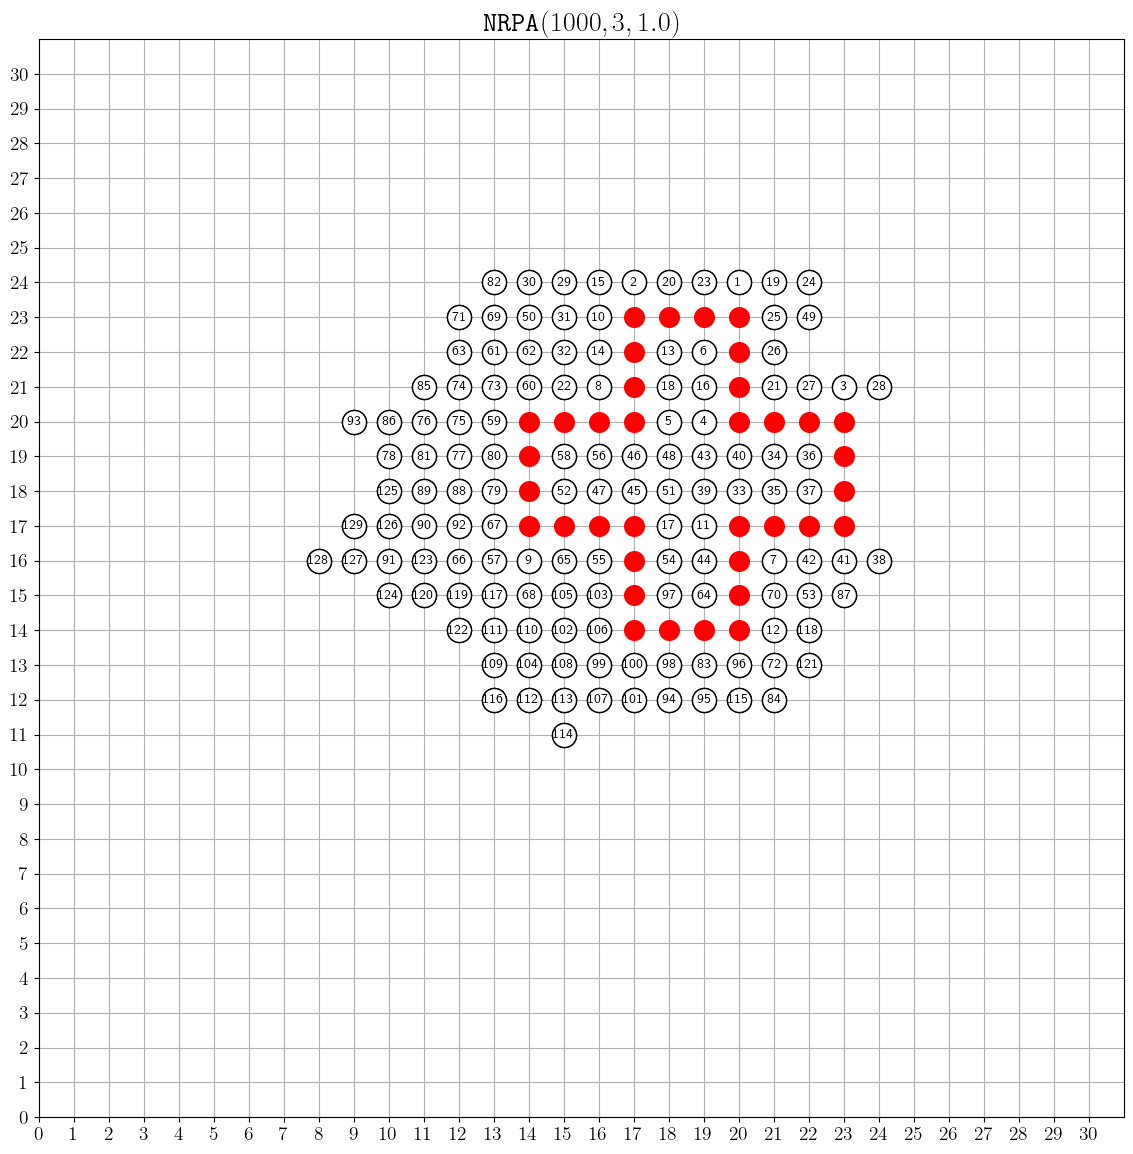

In [83]:
fig, ax = plt.subplots(figsize=(14, 14))
grid = initialize_game()
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == 1:
            ax.scatter(j, i, s=200, facecolors='red', zorder=10)
for move_id, x, y, d, k in moves:
    ax.scatter(x, y, s=300, facecolors='white', edgecolors='black', zorder=10)
    ax.text(x, y, str(move_id), color='black', ha='center', va='center', fontsize=10, zorder=10)
ax.set_xlim(0, 31)
ax.set_ylim(0, 31)
ax.set_xticks(np.arange(0, 31, 1))
ax.set_yticks(np.arange(0, 31, 1))
ax.grid(True)
ax.set_title(r'$\texttt{NRPA}(1000, 3, 1.0)$', fontsize=20)
plt.show()